# **Modelo de Predicción de Rating de Libros usando Regresión Lineal**

### El objetivo de este análisis es predecir la calificación de un libro y comprender cuáles son los factores importantes que hacen que un libro sea más popular que otros. Las secciones de este análisis incluyen:
1. Exploración de datos
2. Limpieza de datos
3. Visualización de datos
4. Preprocesamiento de datos
5. Modelo de aprendizaje automático

In [131]:
# Importar librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [132]:
# Esto permite la visualización de gráficos directamente en el notebook, en lugar de abrir una ventana emergente separada para cada gráfico
%matplotlib inline
sns.set(style = 'darkgrid')
sns.set_palette('deep')

## 1. Exploración de datos

In [ ]:
# Permite importar archivos desde Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Cargar datos
data = pd.read_csv('/content/drive/MyDrive/Project Books/books.csv', error_bad_lines = False)

In [135]:
# Mostrar primeras 5 líneas
data.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [177]:
# La columna "num_pages" tiene espacios agregados al comienzo
# Mostrar los nombres de las columnas antes del cambio
print("Nombres de las columnas antes del cambio:")
print(data.columns)

# Cambiar el nombre de la columna '    num_pages' a 'num_pages' eliminando los espacios en blanco
nuevos_nombres = {col: col.strip() for col in data.columns}
data.rename(columns=nuevos_nombres, inplace=True)

# Mostrar los nombres de las columnas después del cambio
print("\nNombres de las columnas después del cambio:")
print(data.columns)

Nombres de las columnas antes del cambio:
Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

Nombres de las columnas después del cambio:
Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')


In [178]:
# Ver tipos de datos de cada columna
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7   num_pages           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


## 2. Limpieza de datos

In [138]:
# Buscar duplicados
data.duplicated().any()

False

<Axes: >

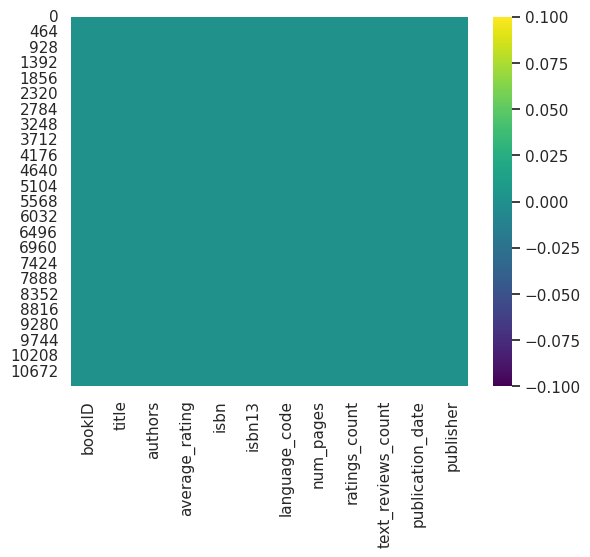

In [139]:
# Uso de mapa de calor para verificar
sns.heatmap(data.isnull(), cmap='viridis')

## 3. Visualización de datos

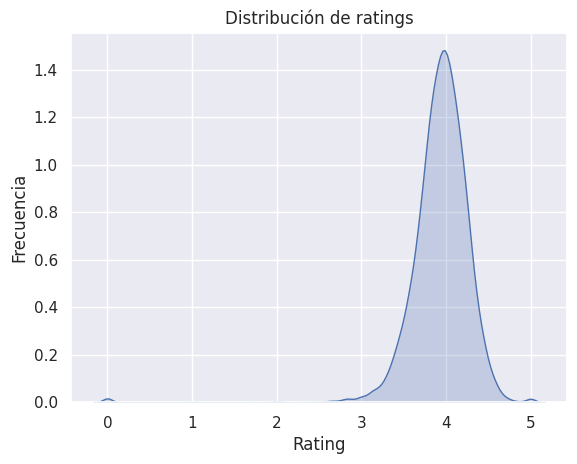

In [161]:
# Distribución de ratings
sns.kdeplot(data['average_rating'], fill = True)
plt.title('Distribución de ratings')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

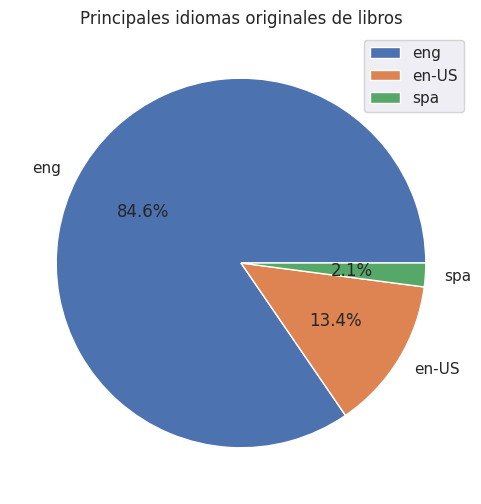

In [160]:
# Top 3 de idiomas
data['language_code'].value_counts().head(3).plot(kind = 'pie', autopct='%1.1f%%', figsize=(6, 6)).legend()
plt.title('Principales idiomas originales de libros')
plt.ylabel('')
plt.show()

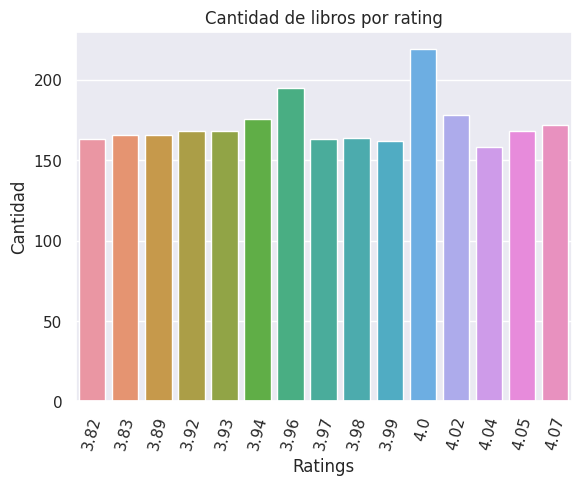

In [162]:
# Cantidad de libros por rating
sns.barplot(x=data['average_rating'].value_counts().head(15).index, y=data['average_rating'].value_counts().head(15))
plt.title('Cantidad de libros por rating')
plt.xlabel('Ratings')
plt.ylabel('Cantidad')
plt.xticks(rotation=75)
plt.show()

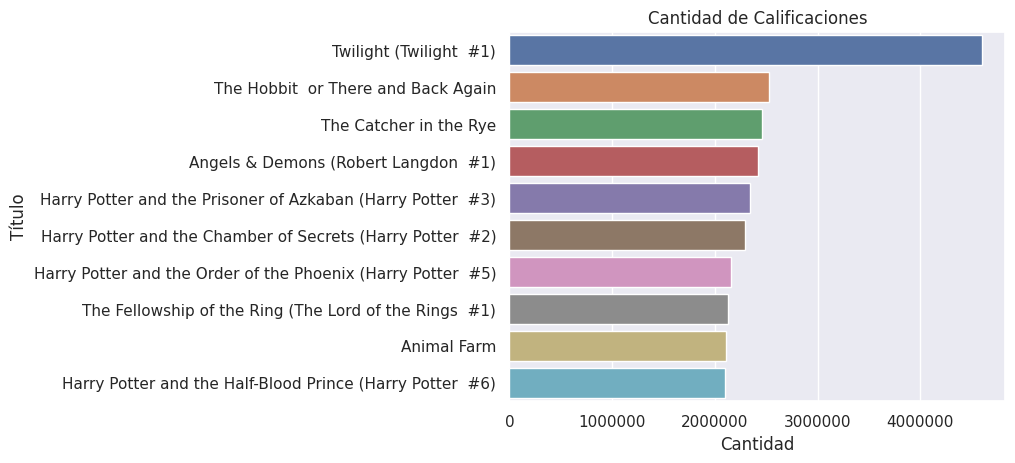

In [153]:
# Cantidad de Calificaciones
popular_books = data.nlargest(10, ['ratings_count']).set_index('title')['ratings_count']
sns.barplot(x=popular_books, y=popular_books.index)
plt.title('Cantidad de Calificaciones')
plt.xlabel('Cantidad')
plt.ylabel('Título')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

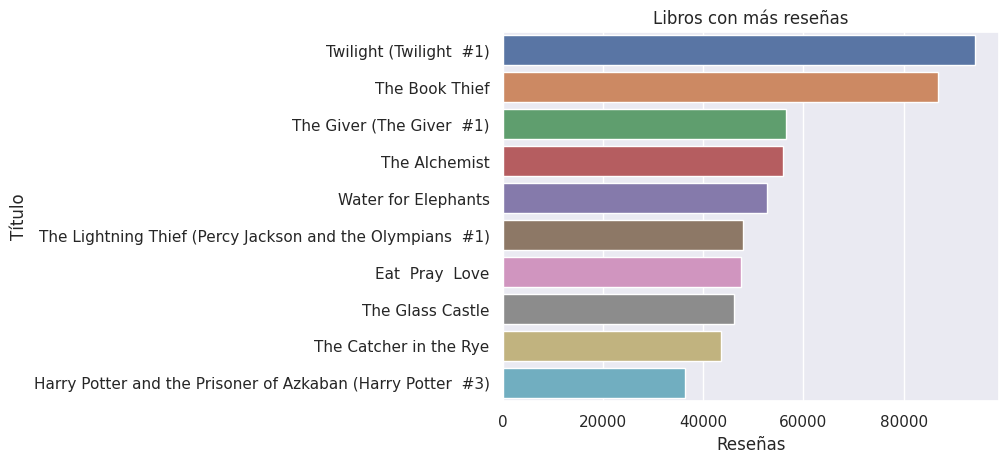

In [147]:
# Libros con más reseñas
highest_reviews = data.nlargest(10, ['text_reviews_count'])
sns.barplot(x=highest_reviews['text_reviews_count'], y=highest_reviews['title'])
plt.title('Libros con más reseñas')
plt.xlabel('Reseñas')
plt.ylabel('Título')
plt.show()

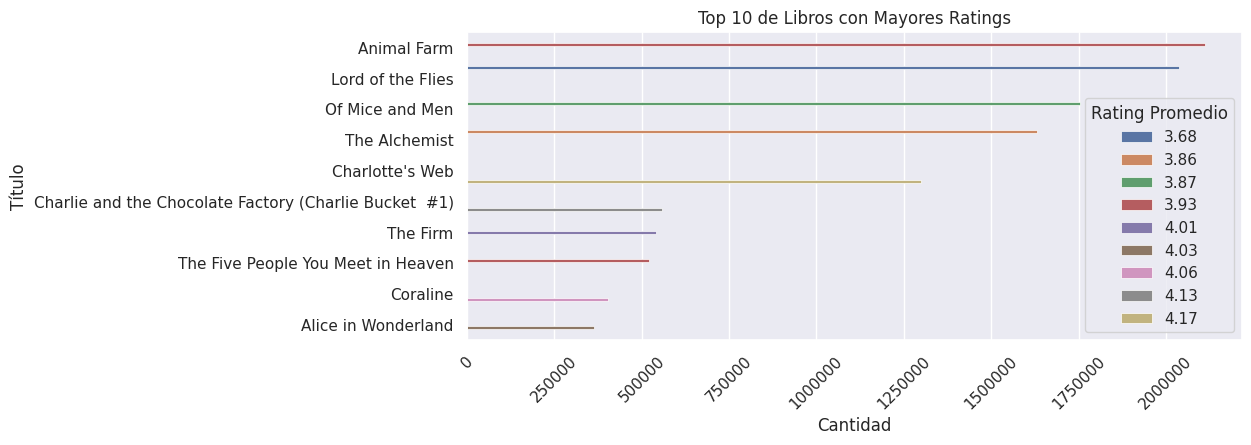

In [152]:
#Top 10 de Libros con Mayores Ratings
under200 = data[data['num_pages'] <= 200]
top10under200 = under200.nlargest(10, 'ratings_count')
plt.figure(figsize=(10, 4))
sns.barplot(x='ratings_count', y='title', hue='average_rating', data=top10under200, linewidth=0.5)
plt.xlabel('Cantidad')
plt.ylabel('Título')
plt.title('Top 10 de Libros con Mayores Ratings')
plt.xticks(rotation=45)
plt.legend(title='Rating Promedio')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

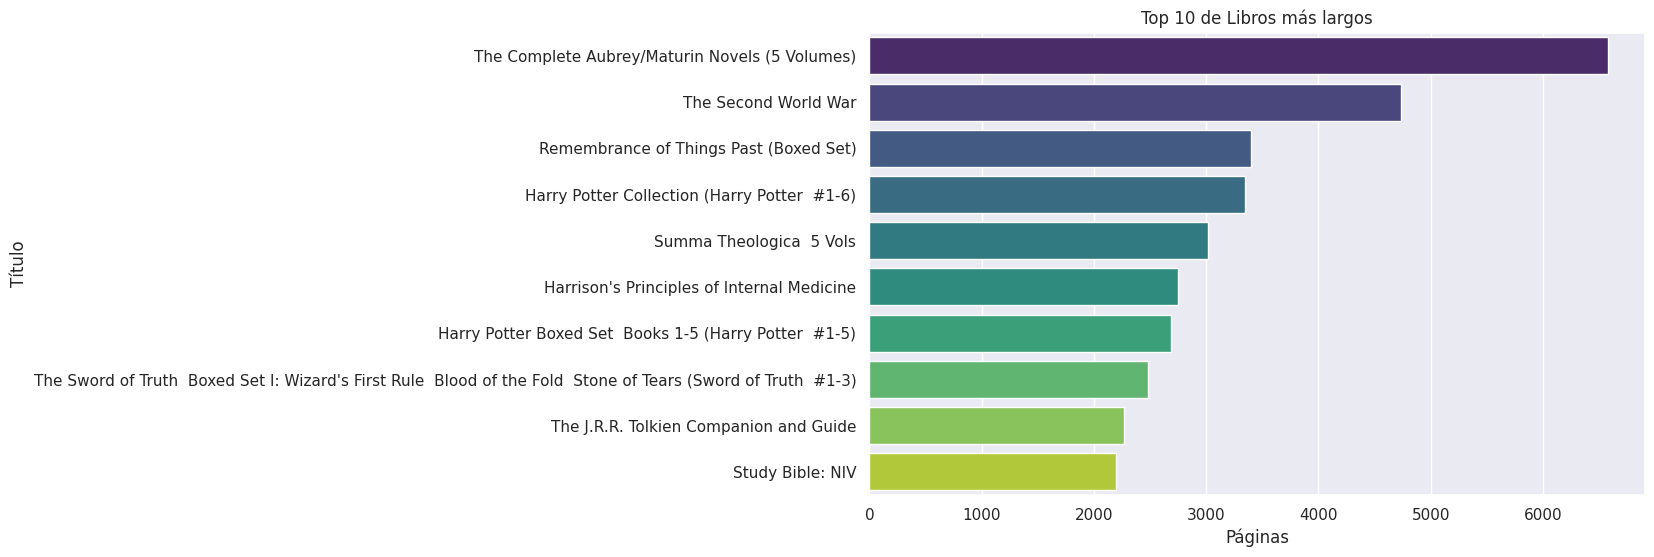

In [163]:
# Seleccionar los 10 libros más largos
longest_books = data.nlargest(10, 'num_pages').set_index('title')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=longest_books['num_pages'], y=longest_books.index, data=longest_books, palette='viridis')
plt.xlabel('Páginas')
plt.ylabel('Título')
plt.title('Top 10 de Libros más largos')
plt.show()

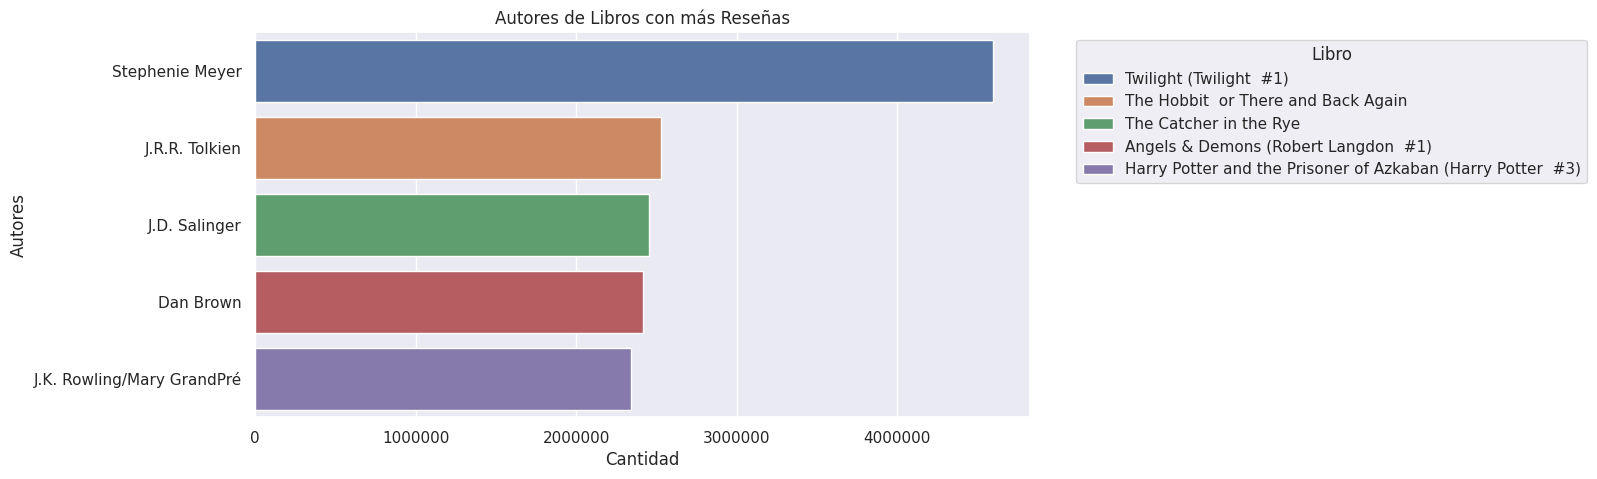

In [166]:
# Seleccionar los 5 autores con más reseñas
plt.figure(figsize=(10, 5))
authors = data.nlargest(5, 'ratings_count').set_index('authors')
sns.barplot(x=authors['ratings_count'], y=authors.index, hue=authors['title'], dodge=False)
plt.xlabel('Cantidad')
plt.ylabel('Autores')
plt.title('Autores de Libros con más Reseñas')
plt.legend(title='Libro', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ticklabel_format(style='plain', axis='x')
plt.show()


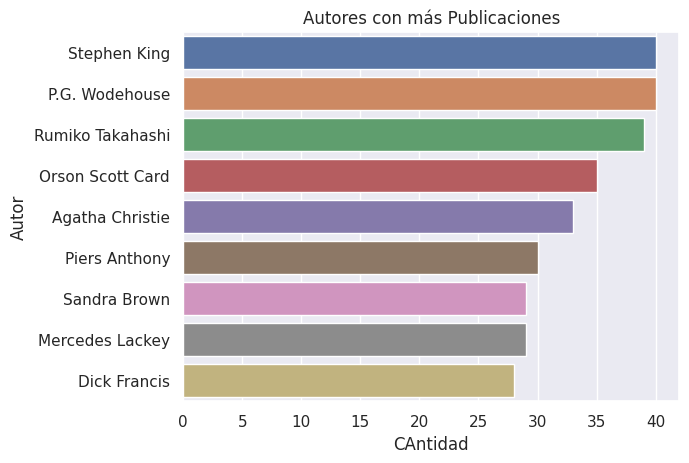

In [168]:
# Autores con más publicaciones
top_authors = data['authors'].value_counts().head(9)
sns.barplot(x=top_authors, y=top_authors.index)
plt.title('Autores con más Publicaciones')
plt.xlabel('CAntidad')
plt.ylabel('Autor')
plt.show()

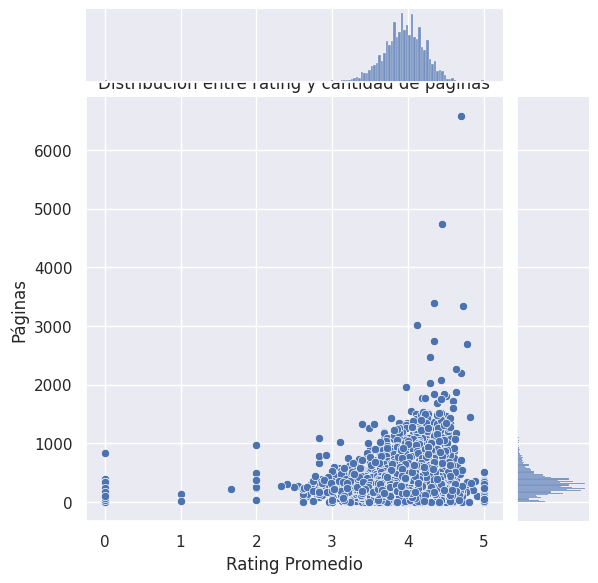

In [169]:
# Distribución entre rating y cantidad de páginas
sns.jointplot(x = 'average_rating', y = 'num_pages', data = data)
plt.title('Distribución entre rating y cantidad de páginas')
plt.ylabel('Páginas')
plt.xlabel('Rating Promedio')
plt.show()

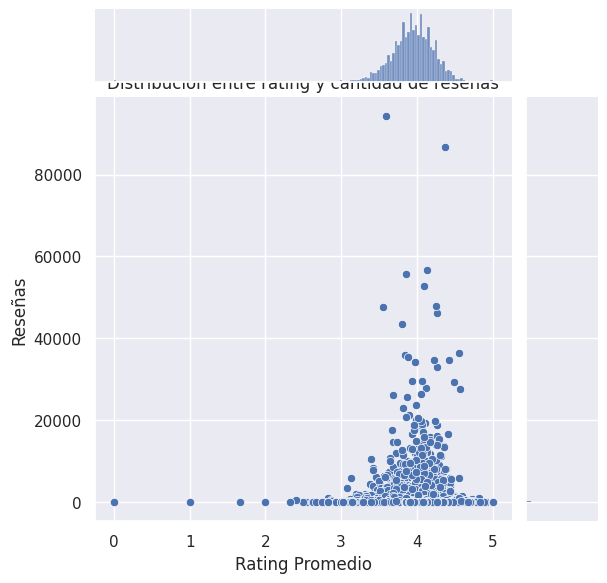

In [170]:
# Distribución entre rating y cantidad de reseñas
sns.jointplot(x = 'average_rating', y = 'text_reviews_count', data = data)
plt.title('Distribución entre rating y cantidad de reseñas')
plt.ylabel('Reseñas')
plt.xlabel('Rating Promedio')
plt.show()

## 4. Preprocesamiento de Datos

##### El preprocesamiento de datos es la conversión de datos a un formato legible por máquina que puede ser interpretado, analizado y utilizado mediante algoritmos de aprendizaje automático.

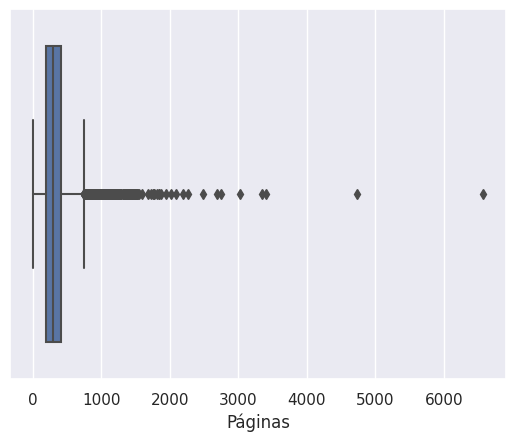

In [179]:
# Detección de outliers en cantidad de páginas
sns.boxplot(x=data['num_pages'])
plt.xlabel('Páginas')
plt.show()

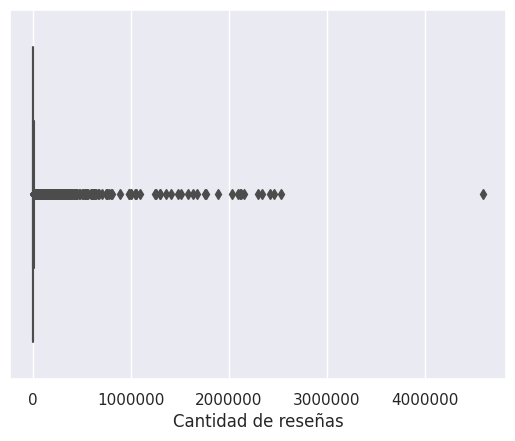

In [180]:
# Detección de outliers en cantidad de calificaciones
sns.boxplot(x=data['ratings_count'])
plt.xlabel('Cantidad de reseñas')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [181]:
# Remover outliers
data = data.drop(data.index[data['num_pages'] >= 1000])
data = data.drop(data.index[data['ratings_count'] >= 1000000])
data = data.drop(data.index[data['text_reviews_count'] >= 20000])

### 2) Feature Engineering

###### Los algoritmos de aprendizaje automático requieren que su entrada sea numérica y, por lo tanto, las características categóricas como el título, los autores y el código de idioma deben transformarse en características numéricas antes de que podamos usar cualquiera de estos algoritmos.

In [182]:
# Codificar las columas 'title', 'authors' y 'languague_code'
le = preprocessing.LabelEncoder()
data['title'] = le.fit_transform(data['title'])
data['authors'] = le.fit_transform(data['authors'])
enc_lang = pd.get_dummies(data['language_code'])
data = pd.concat([data, enc_lang], axis = 1)

In [183]:
data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
2,4,3013,2576,4.42,0439554896,9780439554893,eng,352,6333,244,...,0,0,0,0,0,0,0,0,0,0
5,9,9503,6195,3.74,0976540606,9780976540601,en-US,152,19,1,...,0,0,0,0,0,0,0,0,0,0
7,12,8944,1445,4.38,0517226952,9780517226957,eng,815,3628,254,...,0,0,0,0,0,0,0,0,0,0
8,13,8943,1445,4.38,0345453743,9780345453747,eng,815,249558,4080,...,0,0,0,0,0,0,0,0,0,0
9,14,7659,1445,4.22,1400052920,9781400052929,eng,215,4930,460,...,0,0,0,0,0,0,0,0,0,0


## 5. Modelo de Machine Learning

Se usará regresión lineal para construir un modelo que prediga las calificaciones de libros. El algoritmo de regresión lineal es una técnica básica de análisis predictivo. Hay dos tipos de variables en un modelo de regresión lineal:
1. Variable predictora: variables que ayudan a predecir el valor de la variable de salida. Se le conoce comúnmente como X.
2. Variable de salida: es la variable que se quiere predecir. Se le conoce comúnmente como Y.

In [184]:
# Dividir los datos en X e y
X = data.drop(['average_rating', 'language_code', 'isbn', 'publication_date', 'publisher'], axis = 1)
y = data['average_rating']

In [185]:
# 80% para entrenamiento y 20% para testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [189]:
# Instanciar el objeto
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [190]:
# Utilizar datos de la prueba para verificar con precisión que el algoritmo predice el puntaje.
predictions = lr.predict(X_test)

In [191]:
# Comparar valores reales con los predichos
pred = pd.DataFrame({'Real': y_test.tolist(), 'Predicho': predictions.tolist()}).head(25)
pred.head(10)

,Real,Predicho
0,3.87,3.913778
1,4.21,4.193510
2,4.00,3.956414
3,3.77,3.946852
4,3.78,3.883349
5,3.96,3.922534
6,4.06,3.877822
7,4.42,3.937545
8,3.92,3.928035
9,3.57,3.993172


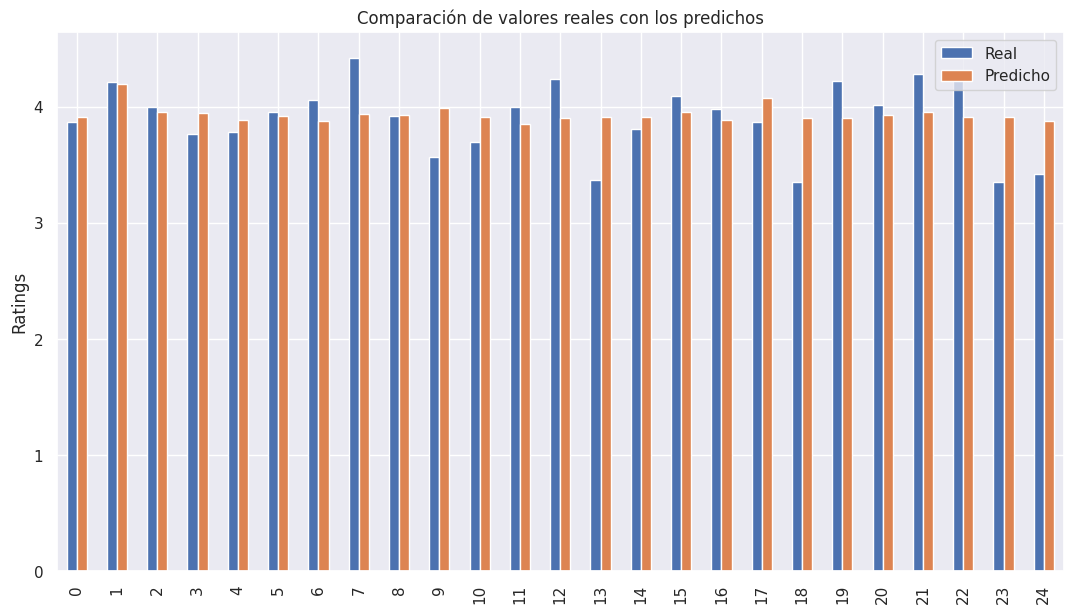

In [193]:
# Visualizar la comparación
pred.plot(kind='bar', figsize=(13, 7))
plt.title('Comparación de valores reales con los predichos')
plt.ylabel('Ratings')
plt.show()

In [194]:
# Evaluar performance del algoritmo
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.23464639008411395
MSE: 0.1436395223800613
RMSE: 0.378998050628313
